## TRAIN DATA

In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd 
df = pd.read_csv("hospital_train.csv")

In [3]:
df.rename(columns={'17': 'days', "15": "age", "14": "visitors", "13":"severity", "12": "admission type", "6": "case", "2": "hospital type", "0": "id"}, inplace=True)

In [4]:
df.set_index("id", inplace=True)

In [5]:
df


,1,hospital type,3,4,5,case,7,8,9,10,11,admission type,severity,visitors,age,16,days
id,,,,,,,,,,,,,,,,,
161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237869,12,a,9,Y,3,gynecology,R,B,3.0,82914,3.0,Emergency,Moderate,6,51-60,3966.0,More than 100 Days
254763,28,b,11,X,2,gynecology,R,F,2.0,40026,5.0,Urgent,Moderate,3,21-30,4005.0,51-60
69788,6,a,6,X,3,gynecology,Q,F,3.0,92346,2.0,Trauma,Minor,2,31-40,5215.0,31-40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 161528 to 69647
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   1               100000 non-null  int64  
 1   hospital type   100000 non-null  object 
 2   3               100000 non-null  int64  
 3   4               100000 non-null  object 
 4   5               100000 non-null  int64  
 5   case            100000 non-null  object 
 6   7               100000 non-null  object 
 7   8               100000 non-null  object 
 8   9               99967 non-null   float64
 9   10              100000 non-null  int64  
 10  11              98517 non-null   float64
 11  admission type  100000 non-null  object 
 12  severity        100000 non-null  object 
 13  visitors        100000 non-null  int64  
 14  age             100000 non-null  object 
 15  16              100000 non-null  float64
 16  days            100000 non-null  object 
dtypes: flo

In [7]:
print(set(df["admission type"]))
print(set(df["severity"]))
print(set(df["visitors"]))
print(set(df["age"]))
print(set(df["days"]))
print(set(df["case"]))
print(set(df["hospital type"]))

{'Urgent', 'Trauma', 'Emergency'}
{'Extreme', 'Moderate', 'Minor'}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 32}
{'21-30', '61-70', '11-20', '41-50', '81-90', '71-80', '31-40', '91-100', '51-60', '0-10'}
{'21-30', '61-70', '11-20', 'More than 100 Days', '41-50', '81-90', '71-80', '31-40', '91-100', '51-60', '0-10'}
{'anesthesia', 'surgery', 'radiotherapy', 'gynecology', 'TB & Chest disease'}
{'f', 'd', 'g', 'a', 'c', 'e', 'b'}


In [8]:
encoder = OrdinalEncoder(categories=[['Trauma', 'Emergency', 'Urgent']])
encoder.fit(df[["admission type"]])
encoded_type = encoder.transform(df[["admission type"]])
df["admission type"] = encoded_type

encoder1 = OrdinalEncoder(categories=[['Minor', 'Moderate', 'Extreme']])
encoder1.fit(df[["severity"]])
encoded_severity = encoder1.transform(df[["severity"]])
df["severity"] = encoded_severity

encoder2 = OrdinalEncoder(categories=[['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100' ]])
encoder2.fit(df[["age"]])
encoded_age = encoder2.transform(df[["age"]])
df["age"] = encoded_age

encoder3 = OrdinalEncoder(categories=[['TB & Chest disease', 'gynecology', 'anesthesia', 'radiotherapy', 'surgery']])
encoder3.fit(df[["case"]])
encoded_case = encoder3.transform(df[["case"]])
df["case"] = encoded_case

encoder4 = OrdinalEncoder(categories=[['a', 'b', 'c', 'g', 'f', 'e', 'd']])
encoder4.fit(df[["hospital type"]])
encoded_hosp = encoder4.transform(df[["hospital type"]])
df["hospital type"] = encoded_hosp





In [9]:
encoder2.inverse_transform(encoded_age)

array([['21-30'],
       ['51-60'],
       ['71-80'],
       ...,
       ['31-40'],
       ['41-50'],
       ['41-50']], dtype=object)

In [10]:
df = df[["admission type","case", "hospital type", "severity", "visitors", "age", "days"]]
df

,admission type,case,hospital type,severity,visitors,age,days
id,,,,,,,
161528,2.0,1.0,0.0,1.0,2,2.0,0-10
159472,0.0,1.0,0.0,1.0,4,5.0,21-30
309765,2.0,2.0,2.0,1.0,2,7.0,11-20
279614,1.0,1.0,4.0,1.0,4,1.0,51-60
147791,2.0,1.0,0.0,1.0,2,5.0,51-60
...,...,...,...,...,...,...,...
237869,1.0,1.0,0.0,1.0,6,5.0,More than 100 Days
254763,2.0,1.0,1.0,1.0,3,2.0,51-60
69788,0.0,1.0,0.0,0.0,2,3.0,31-40


<AxesSubplot:>

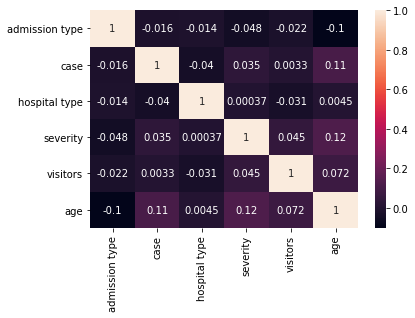

In [11]:
import seaborn as sns 
sns.heatmap(df.corr(), annot=True)

In [12]:
X = np.array(df.drop("days", axis=1))
y = np.array(df["days"])

### TRAIN, TEST SPLIT

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 235)

### SVC


In [14]:
svc = svm.SVC()

parameters = {
    'kernel': ('linear', 'rbf', 'sigmoid'),
    'C': [0.001, 0.1, 0.5, 1, 5, 10],
    'gamma': ('scale', 'auto')
}

clf = GridSearchCV(estimator = svc,
                  param_grid = parameters,
                  n_jobs=-1,
                  cv=10,
                  verbose=2)


In [16]:
clf.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [ ]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

In [17]:
svc.score(X_train, y_train)

0.2832625

In [18]:
svc.score(X_test, y_test)

0.2811

### TEST

In [19]:
df = pd.read_csv("hospital_test.csv")
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,585,2.0,Trauma,Extreme,2,31-40,7072.0


In [20]:
df.rename(columns={'17': 'days', "15": "age", "14": "visitors", "13":"severity", "12": "admission type", "6": "case", "2": "hospital type", "0": "id"}, inplace=True)
df.set_index("id", inplace=True)
df

,1,hospital type,3,4,5,case,7,8,9,10,11,admission type,severity,visitors,age,16
id,,,,,,,,,,,,,,,,
314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0


In [21]:
encoder = OrdinalEncoder(categories=[['Trauma', 'Emergency', 'Urgent']])
encoder.fit(df[["admission type"]])
encoded_type = encoder.transform(df[["admission type"]])
df["admission type"] = encoded_type

encoder1 = OrdinalEncoder(categories=[['Minor', 'Moderate', 'Extreme']])
encoder1.fit(df[["severity"]])
encoded_severity = encoder1.transform(df[["severity"]])
df["severity"] = encoded_severity

encoder2 = OrdinalEncoder(categories=[['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100' ]])
encoder2.fit(df[["age"]])
encoded_age = encoder2.transform(df[["age"]])
df["age"] = encoded_age

encoder3 = OrdinalEncoder(categories=[['TB & Chest disease', 'gynecology', 'anesthesia', 'radiotherapy', 'surgery']])
encoder3.fit(df[["case"]])
encoded_case = encoder3.transform(df[["case"]])
df["case"] = encoded_case

encoder4 = OrdinalEncoder(categories=[['a', 'b', 'c', 'g', 'f', 'e', 'd']])
encoder4.fit(df[["hospital type"]])
encoded_hosp = encoder4.transform(df[["hospital type"]])
df["hospital type"] = encoded_hosp

In [22]:
df

,1,hospital type,3,4,5,case,7,8,9,10,11,admission type,severity,visitors,age,16
id,,,,,,,,,,,,,,,,
314114,19,0.0,7,Y,4,1.0,S,C,2.0,59278,8.0,1.0,0.0,2,4.0,4778.0
208989,15,2.0,5,Z,3,1.0,S,F,2.0,102253,15.0,0.0,1.0,3,3.0,5734.0
305872,17,5.0,1,X,4,1.0,R,E,4.0,5828,4.0,1.0,0.0,3,7.0,5064.0
266099,3,2.0,3,Z,4,0.0,R,A,2.0,56642,9.0,2.0,2.0,4,3.0,3254.0
13228,6,0.0,6,X,4,1.0,R,F,1.0,116266,8.0,1.0,0.0,3,2.0,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318155,18,6.0,13,Y,6,2.0,Q,B,3.0,123269,25.0,2.0,0.0,4,5.0,5089.0
144850,27,0.0,7,Y,2,1.0,S,C,2.0,1293,8.0,1.0,1.0,3,6.0,6713.0
180676,16,2.0,3,Z,3,1.0,R,A,3.0,112921,5.0,0.0,0.0,3,3.0,5326.0


In [23]:
X_pred = np.array(df[["admission type","case", "hospital type", "severity", "visitors", "age"]])

In [24]:
X_pred

array([[1., 1., 0., 0., 2., 4.],
       [0., 1., 2., 1., 3., 3.],
       [1., 1., 5., 0., 3., 7.],
       ...,
       [0., 1., 2., 0., 3., 3.],
       [0., 1., 1., 2., 2., 3.],
       [0., 0., 0., 1., 4., 5.]])

In [25]:
predictions_submit = svc.predict(X_pred)

In [26]:
predictions = pd.DataFrame({"id": df.index, "days": predictions_submit})


In [27]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133744 entries, 0 to 133743
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      133744 non-null  int64 
 1   days    133744 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [28]:
predictions.to_csv("predictions3.csv", index = False)

In [29]:
sample = pd.read_csv("sample_submission.csv")

In [30]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133744 entries, 0 to 133743
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      133744 non-null  int64 
 1   days    133744 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.0+ MB
